<a href="https://colab.research.google.com/github/ananthakrishnanpta/Decision-Tree-and-Ensemble-Methods/blob/main/1_Bagging_Boosting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

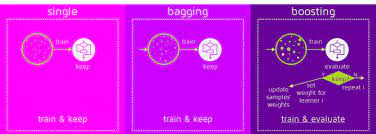
## Understanding the Business Problem
TalkingData is a Chinese big data company, and one of their areas of expertise is mobile advertisements.

In mobile advertisements, click fraud is a major source of losses. Click fraud is the practice of repeatedly clicking on an advertisement hosted on a website with the intention of generating revenue for the host website or draining revenue from the advertiser.

In this case, TalkingData happens to be serving the advertisers (their clients). TalkingData cover a whopping approx. 70% of the active mobile devices in China, of which 90% are potentially fraudulent (i.e. the user is actually not going to download the app after clicking).

You can imagine the amount of money they can help clients save if they are able to predict whether a given click is fraudulent (or equivalently, whether a given click will result in a download).

Their current approach to solve this problem is that they've generated a blacklist of IP addresses - those IPs which produce lots of clicks, but never install any apps. Now, they want to try some advanced techniques to predict the probability of a click being genuine/fraud.

In this problem, we will use the features associated with clicks, such as IP address, operating system, device type, time of click etc. to predict the probability of a click being fraud.



# Project on Bagging and Boosting ensemble model:


**The data contains observations of about 240 million clicks, and whether a given click resulted in a download or not (1/0):**

The detailed data dictionary is mentioned here:
- ```ip```: ip address of click.
- ```app```: app id for marketing.
- ```device```: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
- ```os```: os version id of user mobile phone
- ```channel```: channel id of mobile ad publisher
- ```click_time```: timestamp of click (UTC)
- ```attributed_time```: if user download the app for after clicking an ad, this is the time of the app download
- ```is_attributed```: the target that is to be predicted, indicating the app was downloaded

Let's try finding some useful trends in the data.

    **1. Explore the dataset for anomalies and missing values and take corrective actions if necessary.**

    **2. Which column has maximum number of unique values present among all the available columns**

    **3. Use an appropriate technique to get rid of all the apps that are very rare (say which comprise of less                than 20% clicks) and plot the rest..** 

    **4. By using Pandas derive new features such as - 'day_of_week' , 'day_of_year' , 'month' , and 'hour' as                  float/int datatypes using the 'click_time' column . Add the newly derived columns in original dataset.**

    **5. Divide the data into training and testing subsets into 80:20 ratio(Train_data = 80% , Testing_data = 20%) and
         check the average download rates('is_attributed') for train and test data, scores should be comparable.**

    **6. Apply XGBoostClassifier with default parameters on training data and make first 10 prediction for Test data.          NOTE: Use y_pred = model.predict_proba(X_test) since we need probabilities to compute AUC.** 

    **7. On evaluating the predictions made by the model what is the AUC/ROC score with default hyperparameters.**

    **8. Compute feature importance score and name the top 5 features/columns .**
    
    **9. Apply BaggingClassifier with base_estimator LogisticRegression and compute AUC/ROC score.
    
    **10.  On the basis of AUC/ROC score which one will you choose from BaggingClassifier and XGBoostClassifier and              why?What does AUC/ROC score signifies?
    
    **11.  What is the accuracy for BaggingClassifier and XGBoostClassifier?()
 ### All the Best!!!

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

%matplotlib inline

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/techis-ds-wiki/DS/Step 2-3 DT and Ensemble/03_Project/talking_data.csv")

In [5]:
df

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0


In [6]:
## **1. Explore the dataset for anomalies and missing values and take corrective actions if necessary.**


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [7]:
df.describe

<bound method NDFrame.describe of            ip  app  device  os  channel           click_time attributed_time  \
0       87540   12       1  13      497  2017-11-07 09:30:38             NaN   
1      105560   25       1  17      259  2017-11-07 13:40:27             NaN   
2      101424   12       1  19      212  2017-11-07 18:05:24             NaN   
3       94584   13       1  13      477  2017-11-07 04:58:08             NaN   
4       68413   12       1   1      178  2017-11-09 09:00:09             NaN   
...       ...  ...     ...  ..      ...                  ...             ...   
99995  124883   11       1  19      122  2017-11-09 13:25:41             NaN   
99996   85150    9       1  13      244  2017-11-07 11:25:43             NaN   
99997   18839    3       1  13       19  2017-11-08 11:38:42             NaN   
99998  114276   15       1  12      245  2017-11-08 17:55:21             NaN   
99999  119349   14       1  15      401  2017-11-07 14:32:27             NaN   

     

In [8]:
df['click_time']

0        2017-11-07 09:30:38
1        2017-11-07 13:40:27
2        2017-11-07 18:05:24
3        2017-11-07 04:58:08
4        2017-11-09 09:00:09
                ...         
99995    2017-11-09 13:25:41
99996    2017-11-07 11:25:43
99997    2017-11-08 11:38:42
99998    2017-11-08 17:55:21
99999    2017-11-07 14:32:27
Name: click_time, Length: 100000, dtype: object

In [9]:
# Checking for null values

df.isnull().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [10]:
df[df['attributed_time'].isnull()]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0


In [11]:
# For rows with 'is_attributed' == 0, 'attributed_time' is NaN

In [12]:
df['is_attributed'].value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

In [13]:
# **2. Which column has maximum number of unique values present among all the available columns**

no_unique = {}
for i in df.columns:
  print("The column '{}' has {} unique values.".format(i, len(list(df[i].unique()))))
  print()
  no_unique[i] = len(list(df[i].unique()))
m = max(no_unique.values())


print("The column having the maximum number of unique values is '{}' with {} unique values.".format(list(no_unique.keys())[list(no_unique.values()).index(m)],m))





The column 'ip' has 34857 unique values.

The column 'app' has 161 unique values.

The column 'device' has 100 unique values.

The column 'os' has 130 unique values.

The column 'channel' has 161 unique values.

The column 'click_time' has 80350 unique values.

The column 'attributed_time' has 228 unique values.

The column 'is_attributed' has 2 unique values.

The column having the maximum number of unique values is 'click_time' with 80350 unique values.


In [14]:
# **3. Use an appropriate technique to get rid of all the apps that are very rare (say which comprise of less than 20% clicks) and plot the rest..** 

df['app'].value_counts()
total_clicks = len(list(df['app']))
print("Total number of clicks  = ",total_clicks)
t20_per = 0.2 * total_clicks


for index, value in df['app'].value_counts().items():
  # if value > t20_per:
    print("App with app id :- '{}' has '{}' clicks.".format(index,value))
   


# not dropping app ids which comprises of less than 20% of total clicks because none of the app ids contribute more than 20% to the total data


Total number of clicks  =  100000
App with app id :- '3' has '18279' clicks.
App with app id :- '12' has '13198' clicks.
App with app id :- '2' has '11737' clicks.
App with app id :- '9' has '8992' clicks.
App with app id :- '15' has '8595' clicks.
App with app id :- '18' has '8315' clicks.
App with app id :- '14' has '5359' clicks.
App with app id :- '1' has '3135' clicks.
App with app id :- '13' has '2422' clicks.
App with app id :- '8' has '2004' clicks.
App with app id :- '21' has '1979' clicks.
App with app id :- '11' has '1927' clicks.
App with app id :- '26' has '1633' clicks.
App with app id :- '23' has '1454' clicks.
App with app id :- '6' has '1303' clicks.
App with app id :- '64' has '1079' clicks.
App with app id :- '7' has '981' clicks.
App with app id :- '20' has '911' clicks.
App with app id :- '25' has '804' clicks.
App with app id :- '28' has '720' clicks.
App with app id :- '24' has '704' clicks.
App with app id :- '27' has '696' clicks.
App with app id :- '19' has '4

In [15]:
# **4. By using Pandas derive new features such as - 'day_of_week' , 'day_of_year' , 'month' , and 'hour' as float/int datatypes 
# using the 'click_time' column . Add the newly derived columns in original dataset.**
import datetime
df['click_time'] = pd.to_datetime(df['click_time'])

df['day_of_week'] = df['click_time'].apply(lambda x :x.strftime('%u')).astype(int)
df['day_of_year'] = df['click_time'].apply(lambda x :x.strftime('%j')).astype(int)
df['month'] = df['click_time'].apply(lambda x :x.strftime('%m')).astype(int)
df['hour'] = df['click_time'].apply(lambda x :x.strftime('%H')).astype(int)

# day_of_year = 
# month = 
# hour = 
df

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day_of_week,day_of_year,month,hour
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,2,311,11,9
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,2,311,11,13
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,2,311,11,18
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,2,311,11,4
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,4,313,11,9
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0,4,313,11,13
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0,2,311,11,11
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0,3,312,11,11
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0,3,312,11,17


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ip               100000 non-null  int64         
 1   app              100000 non-null  int64         
 2   device           100000 non-null  int64         
 3   os               100000 non-null  int64         
 4   channel          100000 non-null  int64         
 5   click_time       100000 non-null  datetime64[ns]
 6   attributed_time  227 non-null     object        
 7   is_attributed    100000 non-null  int64         
 8   day_of_week      100000 non-null  int64         
 9   day_of_year      100000 non-null  int64         
 10  month            100000 non-null  int64         
 11  hour             100000 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 9.2+ MB


In [17]:
df['attributed_time'].unique

<bound method Series.unique of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: attributed_time, Length: 100000, dtype: object>

In [18]:
# **5. Divide the data into training and testing subsets into 80:20 ratio(Train_data = 80% , Testing_data = 20%) and
#      check the average download rates('is_attributed') for train and test data, scores should be comparable.**


from sklearn.model_selection import train_test_split # # Import Sklearn package's data splitting function
from sklearn import metrics
from sklearn import preprocessing

x = df.drop(['is_attributed','attributed_time','click_time'], axis=1)
y = df['is_attributed']



In [19]:
df['is_attributed'].value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

In [20]:
# The class is not balanced.
# Let's use SMOTE to balance the data

from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_sm,y_sm = sm.fit_resample(x,y)
print(x_sm.shape)
print(y_sm.shape)
print(y_sm.value_counts())


(199546, 9)
(199546,)
0    99773
1    99773
Name: is_attributed, dtype: int64


In [21]:
# Now the class 'is_attributed' is balanced

# Split X and y into training and test set in 80:20 ratio
x = x_sm
y = y_sm
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [22]:
# **6. Apply XGBoostClassifier with default parameters on training data and make first 10 prediction for Test data.


import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Initializing classifier
xgb_cl = xgb.XGBClassifier()

# Fitting
xgb_cl.fit(x_train, y_train)

# Predict
y_pred = xgb_cl.predict(x_test)

accuracy_score(y_test, y_pred)



0.9513154597845151

In [29]:
#First ten predictions
pd.DataFrame(y_pred).join(y_test)

,0,is_attributed
0,0,NaN
1,0,0.0
2,1,NaN
3,0,NaN
4,1,NaN
...,...,...
39905,0,0.0
39906,1,NaN
39907,1,NaN
39908,1,NaN


In [24]:
# **7. On evaluating the predictions made by the model what is the AUC/ROC score with default hyperparameters.**


from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print("AUC/ROC score is :- ",roc_auc_score(y_test, y_pred))

print("\n Confusion Matrix:- ")
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted downloaded', "Predicted not_downloaded"], index=['Actual downloaded', 'Actual not_downloaded'])


AUC/ROC score is :-  0.9513359194884587

 Confusion Matrix:- 


,Predicted downloaded,Predicted not_downloaded
Actual downloaded,19083,818
Actual not_downloaded,1125,18884


In [25]:
# **9. Apply BaggingClassifier with base_estimator LogisticRegression and compute AUC/ROC score.

from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(x_train, y_train)
test_pred = bgcl.predict(x_test)
bgcl_score=bgcl.score(x_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.9969681784014032
The confusion matrix of Bagging classifier model is
[[19806    95]
 [   26 19983]]


In [28]:
# **8. Compute feature importance score and name the top features/columns .**

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier



def rf_rfe(df):
    X=df.iloc[:,:-1]
    y=df.iloc[:,-1]
    model=RandomForestClassifier()
    rfe=RFE(model)
    rfe.fit(X,y)
    features=X.columns[rfe.ranking_ == 1]

    return features.tolist()

rf_rfe(df.drop(['is_attributed','attributed_time','click_time'], axis=1))

['ip', 'app', 'os', 'channel']